# Checkpoint 1: Data Cleaning 1

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
companies = pd.read_csv('companies.csv',encoding='iso-8859-1');
rounds2 = pd.read_csv('rounds2.csv',encoding='iso-8859-1')
mapping = pd.read_csv('mapping.csv')

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01/03/14,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30/01/14,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0


In [5]:
# Renaming all the permalink to not have confusion with upper and lower cases
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: '/organization/' + x[14:].lower())

In [6]:
rounds2.company_permalink.value_counts()

/organization/solarflare                  19
/organization/semprius                    18
/organization/quellan                     18
/organization/exagen-diagnostics          18
/organization/vocalocity                  17
                                          ..
/organization/semafore-pharmaceuticals     1
/organization/cubic-robotics               1
/organization/fastdue                      1
/organization/proactivenet                 1
/organization/kvz-sports                   1
Name: company_permalink, Length: 66370, dtype: int64

In [7]:
companies.permalink = companies.permalink.apply(lambda x: '/organization/' + x[14:].lower())

In [8]:
x1 = np.array(pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink').company_permalink)
len(x1)

114942

In [9]:
x2 = np.array(rounds2.company_permalink)
len(x2)

114949

In [10]:
# Companies which are not present in the master array
np.array(set(x1).symmetric_difference(x2))

array({'/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80', '/organization/e-cã\x8abica', '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦', '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80', '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f', '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80', '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'},
      dtype=object)

In [11]:
# Combined data of companies and rounds data
master_frame = pd.merge(companies,rounds2,left_on='permalink',right_on='company_permalink')

In [12]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01/03/14,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0


# Checkpoint 2: Funding Type Analysis

In [13]:
master_frame.permalink.value_counts()

/organization/solarflare                  19
/organization/semprius                    18
/organization/exagen-diagnostics          18
/organization/quellan                     18
/organization/tigo-energy                 17
                                          ..
/organization/semafore-pharmaceuticals     1
/organization/cubic-robotics               1
/organization/fastdue                      1
/organization/proactivenet                 1
/organization/kvz-sports                   1
Name: permalink, Length: 66363, dtype: int64

In [14]:
master_frame.funding_round_type.value_counts()

venture                  55493
seed                     30518
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [15]:
# Calculating mean for venture funding type
ventureValue = master_frame[master_frame['funding_round_type'] == 'venture']
ventureValue.raised_amount_usd.mean()

11748949.129489528

In [16]:
# Calculating mean for angel funding type
angelValue = master_frame[master_frame['funding_round_type'] == 'angel']
angelValue.raised_amount_usd.mean()

958694.4697530865

In [17]:
# Calculating mean for seed funding type
seedValue = master_frame[master_frame['funding_round_type'] == 'seed']
seedValue.raised_amount_usd.mean()

719779.6202016778

In [18]:
# Calculating mean for private equity funding type
pEquityValue = master_frame[master_frame['funding_round_type'] == 'private_equity']
pEquityValue.raised_amount_usd.mean()

73308593.02944215

In [19]:
ventureValue.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30/01/14,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24/07/14,NaN


In [20]:
totalRaisedAmount = pd.pivot_table(data=ventureValue,values='raised_amount_usd',index='country_code',aggfunc='sum')
top9PivotTable = pd.DataFrame.sort_values(totalRaisedAmount, by='raised_amount_usd',ascending=False)[:9]
top9PivotTable.head()

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09


# Checkpoint 3: Country Analysis

In [21]:
# Top 9 countries which have received the highest total funding with investment type 'venture' 
top9 = master_frame[master_frame.country_code.isin(list(top9PivotTable.index))]
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01/03/14,700000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24/07/14,NaN


### Countries with 'English' as official language among the top 9 investment countries:
['USA', 'GBR', 'IND']



# Checkpoint 4: Sector Analysis 1


In [22]:
# Removing anomalies in the "mapping" dataset
mapping = mapping.set_index('category_list')
mapping.index = mapping.index.str.lower()
mapping.index.values[0] = 'nan'
mapping = mapping.rename(index={'a0lytics': 'analytics','fi0ncial exchanges': 'financial exchanges', 'energy ma0gement': 'energy management',
                               'business a0lytics': 'business analytics', 'fi0nce': 'finance', 'project ma0gement': 'project management',
                               'career ma0gement': 'career management', 'nanotechnology': 'nanotechnology', 'fi0nce technology': 'finance technology',
                               'fi0ncial services': 'financial services', 'fleet ma0gement': 'fleet management', 'identity ma0gement': 'identity management', 
                               'innovation ma0gement': 'innovation management', 'it ma0gement': 'it management', 'jour0lism': 'journalism',
                               'knowledge ma0gement': 'knowledge management', 'mobile a0lytics': 'mobile analytics', '0notechnology': 'nanotechnology',
                               '0tural resources': 'natural resources', '0vigation': 'navigation', '0tural language processing': 'natural language processing',
                               'perso0l branding': 'personal branding', 'perso0l data': 'personal data', 'perso0l fi0nce': 'personal finance',
                                'perso0l health' : 'personal health', 'perso0lization': 'personalization', 'predictive a0lytics': 'predictive analytics',
                                'professio0l networking': 'professional networking', 'promotio0l': 'promotional', 'property ma0gement': 'property management',
                                'risk ma0gement': 'risk management', 'alter0tive medicine': 'alternative medicine','big data a0lytics': 'big data analytics',
                               'chi0 internet': 'china internet','contact ma0gement': 'contact management', 'cloud ma0gement': 'cloud management',
                               'document ma0gement': 'document management','digital sig0ge':'digital signage','digital rights ma0gement':'digital rights ma0gement',
                               'can0bis':'cannabis','waste ma0gement': 'waste management','veteri0ry': 'veterinary', 'social media ma0gement': 'social media management', 'digital rights ma0gement': 'digital rights management',
                               'gover0nce': 'governance', 'supply chain ma0gement':'supply chain management','intellectual asset ma0gement': 'intellectual asset management',
                               'educatio0l games': 'educational games', 'task ma0gement': 'task management','0tural gas uses': 'natural gas uses',
                                'digital rights ma0gement': 'digital rights management','social media ma0gement': 'social media management',
                                'professio0l services' :'professio0l services','medical professio0ls': 'medical professio0ls','lead ma0gement': 'lead management',
                                'investment ma0gement': 'investment ma0gement', 'event ma0gement': 'event management','digital rights ma0gement': 'digital rights management'
                               })

In [23]:
def findPrimarySector(val):
    global mapping
    primary_sec = []
    arr = str(val).split('|');
    if(arr[0].lower() in mapping.index):
        tempVar = mapping.loc[arr[0].lower()]
        primary_sec = [x for x in tempVar.keys() if (tempVar[x] == 1)];
        return str(primary_sec[0])
    else:
        return 'Blanks'
primarySector = top9.category_list.apply(findPrimarySector)
top9['primary_sector'] = primarySector;

In [24]:
top9

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0,Entertainment
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14/10/14,NaN,"News, Search and Messaging"
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01/03/14,700000.0,"News, Search and Messaging"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19/03/08,2000000.0,"News, Search and Messaging"
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24/07/14,NaN,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/organization/zzish,/funding-round/34b560f672bebeb339a5efa3b27eae5d,grant,NaN,25/02/15,400000.0,"Social, Finance, Analytics, Advertising"
114932,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/organization/zzish,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,NaN,31/10/14,400000.0,"Social, Finance, Analytics, Advertising"
114933,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24/03/14,320000.0,"Social, Finance, Analytics, Advertising"
114934,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01/04/12,1587301.0,Others


In [25]:
top9.primary_sector.value_counts()

Social, Finance, Analytics, Advertising    20952
Others                                     20920
Cleantech / Semiconductors                 14755
News, Search and Messaging                 12358
Health                                      7158
Entertainment                               6329
Manufacturing                               6086
Automotive & Sports                         1916
Blanks                                      1515
Name: primary_sector, dtype: int64

In [26]:
top9.country_code.value_counts()

USA    72308
GBR     5966
CAN     3115
CHN     2693
IND     2233
DEU     1751
FRA     1650
ISR     1631
JPN      642
Name: country_code, dtype: int64

# Checkpoint 5: Sector Analysis 2

In [27]:
# Dataframe with only top 3 countries with 'English' as official language
top3 = top9[top9.country_code.isin(list(['USA','GBR','IND']))]

In [28]:
top3.primary_sector.value_counts()

Social, Finance, Analytics, Advertising    18412
Others                                     18156
Cleantech / Semiconductors                 13247
News, Search and Messaging                 10650
Health                                      6523
Entertainment                               5341
Manufacturing                               5247
Automotive & Sports                         1686
Blanks                                      1245
Name: primary_sector, dtype: int64

In [29]:
from collections import Counter 

def countryWiseInvestment(data):
    mainSectors = data.primary_sector.value_counts().index.values
    print(data.country_code.iloc[0])
    mainSectorsInvestment = {};
    for x in mainSectors:
        mainSectorsInvestment[x] = (data[data.primary_sector == x].raised_amount_usd.count())
    temp = list(Counter(mainSectorsInvestment).most_common(3))
    for i in range(len(temp)):
        temp[i] = list(temp[i])
        temp[i].append(data.country_code.iloc[0])
    return temp

def sectorsWithTopInvestment(df):
    sectorsList = []        
    [sectorsList.append(x) for country in list(['USA','GBR','IND']) for x in countryWiseInvestment(df.loc[(top3['country_code'] == country) & (df['primary_sector'] != 'Blanks')])]
    return sectorsList

# Performaing calculations on the datasets of the top 3 countries only
sectorsWithTopInvestment_val = sectorsWithTopInvestment(top3)

USA
GBR
IND


In [30]:
# Top Sectors per country in top 3 sectors which recevied maximum number of investments in each of the sector
sectorsWithTopInvestment_val

[['Others', 13854, 'USA'],
 ['Social, Finance, Analytics, Advertising', 13832, 'USA'],
 ['Cleantech / Semiconductors', 11650, 'USA'],
 ['Social, Finance, Analytics, Advertising', 1290, 'GBR'],
 ['Others', 1159, 'GBR'],
 ['News, Search and Messaging', 738, 'GBR'],
 ['Others', 533, 'IND'],
 ['Social, Finance, Analytics, Advertising', 332, 'IND'],
 ['News, Search and Messaging', 276, 'IND']]

In [31]:
top3.funding_round_type.value_counts()

venture                  41667
seed                     18203
debt_financing            6297
angel                     3493
undisclosed               2815
equity_crowdfunding       2793
private_equity            1586
grant                     1358
convertible_note          1328
post_ipo_equity            403
product_crowdfunding       252
post_ipo_debt              127
non_equity_assistance      109
secondary_market            76
Name: funding_round_type, dtype: int64

In [32]:
# Datasets with top 3 countries with 'English' as Official language. 
# Removed 'Blanks' from primary sector to get only the 8 primary sectors

D1 = top3.loc[(top3['country_code'] == 'USA') & (top3['primary_sector'] != 'Blanks') & (top3['raised_amount_usd'] != 'nan') & (top3['funding_round_type'] == 'venture')]
D2 = top3.loc[(top3['country_code'] == 'GBR') & (top3['primary_sector'] != 'Blanks') & (top3['raised_amount_usd'] != 'nan') & (top3['funding_round_type'] == 'venture')]
D3 = top3.loc[(top3['country_code'] == 'IND') & (top3['primary_sector'] != 'Blanks') & (top3['raised_amount_usd'] != 'nan') & (top3['funding_round_type'] == 'venture')]

In [33]:
D1.reset_index(inplace=True)
D2.reset_index(inplace=True)
D3.reset_index(inplace=True)

In [34]:
# Total amount of investment in C1
D1.raised_amount_usd.sum()

419536374266.0

In [35]:
# Total amount of investment in C2
D2.raised_amount_usd.sum()

20003991718.0

In [36]:
# Total amount of investment in C3
D3.raised_amount_usd.sum()

14259008718.0

In [37]:
# company received the highest investment in top sector in C1
D1[D1['primary_sector'] == 'Others'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/social-finance    1.365200e+09
/organization/snapchat          1.165100e+09
/organization/livingsocial      8.182250e+08
/organization/facebook          6.152000e+08
/organization/zenefits          5.815000e+08
Name: raised_amount_usd, dtype: float64

In [38]:
# company received the highest investment in second top sector in C1
D1[D1['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/mediavast    4.715000e+09
/organization/groupon      1.136000e+09
/organization/cloudera     1.041000e+09
/organization/wework       9.959343e+08
/organization/zynga        8.665508e+08
Name: raised_amount_usd, dtype: float64

In [39]:
# company received the highest investment in top sector in C2
D2[D2['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/powa-technologies    176700000.0
/organization/borro                171572758.0
/organization/worldremit           147109000.0
/organization/wonga                145393366.0
/organization/mereo                119000000.0
Name: raised_amount_usd, dtype: float64

In [40]:
# company received the highest investment in second top sector in C2
D2[D2['primary_sector'] == 'Others'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/oneweb            500000000.0
/organization/farfetch          194500000.0
/organization/liquid-telecom    150000000.0
/organization/picochip          111500000.0
/organization/newvoicemedia     111300000.0
Name: raised_amount_usd, dtype: float64

In [41]:
# company received the highest investment in top sector in C3
D3[D3['primary_sector'] == 'Others'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/flipkart             2.451000e+09
/organization/snapdeal             3.107000e+08
/organization/tata-teleservices    2.120000e+08
/organization/myntra               1.587500e+08
/organization/pepperfry-com        1.280000e+08
Name: raised_amount_usd, dtype: float64

In [42]:
# company received the highest investment in second top sector in C3
D3[D3['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('company_permalink', sort = True).sum('raised_amount_usd')['raised_amount_usd'].nlargest() 

company_permalink
/organization/shopclues-com     129000000.0
/organization/ybrant-digital    103000000.0
/organization/yepme-com          88200000.0
/organization/bankbazaar         79000000.0
/organization/policybazaar       69600000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

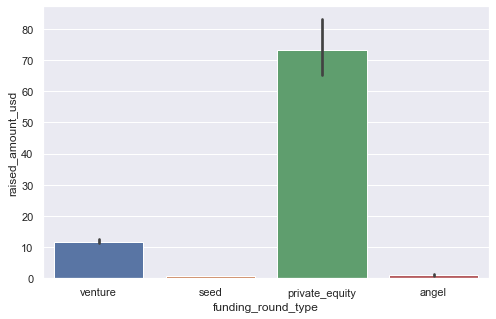

In [43]:
# Barchart to show the funding type which is best for range 5 to 15 million dollars investment

plt.figure(figsize=[8,5])
sns.set_theme()
top4FundTypeData = master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])]
sns.barplot(x= top4FundTypeData['funding_round_type'], y= top4FundTypeData['raised_amount_usd']/1000000)
plt.show()

In [44]:
countryWithLanguageMap=pd.DataFrame({'country_code': ['GBR','CHN','USA','ISR','CAN','FRA','IND','DEU','JPN'],
                        'English Official language': [True,False,True,True,True,False,True,False,False]})
countryWithLanguageMap.head(n=10)

,country_code,English Official language
0,GBR,True
1,CHN,False
2,USA,True
3,ISR,True
4,CAN,True
5,FRA,False
6,IND,True
7,DEU,False
8,JPN,False


In [45]:
englishSpeakingCountries=pd.merge(top9,countryWithLanguageMap,how='inner',on='country_code')
englishSpeakingCountries.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,English Official language
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05/01/15,10000000.0,Entertainment,True
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22/07/13,NaN,Health,True
2,/organization/1click,1CLICK,http://1click.io,Chat|Mobile,acquired,IND,19,Bangalore,Bangalore,01-11-2012,/organization/1click,/funding-round/19c77bc4b09e68e62f9a376d24115be4,seed,NaN,26/01/14,NaN,"News, Search and Messaging",True
3,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15/11/12,6369507.0,Others,True
4,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06/11/07,4000000.0,Others,True


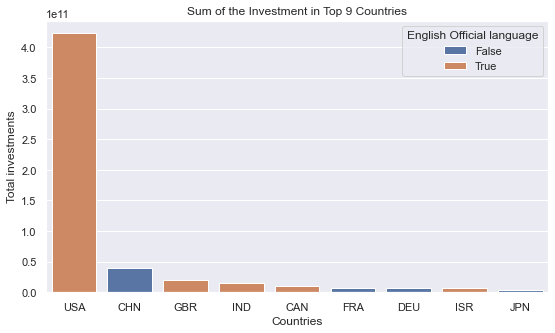

In [46]:
# plot showing the top 9 countries against the sum of investments of venture funding type
plt.figure(figsize=[9,5])
sns.set_theme()
temp = englishSpeakingCountries[englishSpeakingCountries['funding_round_type'] == 'venture']
plot = sns.barplot(x= 'country_code', y= 'raised_amount_usd', estimator=sum, order = ['USA','CHN', 'GBR','IND','CAN','FRA','DEU','ISR','JPN'],
                 hue='English Official language' , data = temp, dodge=False, ci=None)
plt.title("Sum of the Investment in Top 9 Countries") 
plot.set(xlabel='Countries', ylabel='Total investments')
plt.show()

In [47]:
df = pd.DataFrame(sectorsWithTopInvestment_val, columns=['primary_sector','total_investment','country'])

In [48]:
df = pd.melt(df, id_vars=['country','primary_sector'], value_vars='total_investment', var_name="total_investment", value_name="investments")

[Text(0.5, 0, 'Country'), Text(0, 0.5, 'Total investments')]

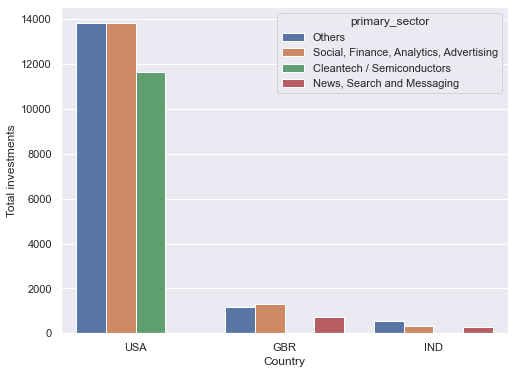

In [49]:
# plot showing the number of investments in the top 3 sectors of the top 3 countries
plt.figure(figsize=[8,6])
graph = sns.barplot(x='country', y='investments', hue='primary_sector', data=df)
graph.set(xlabel='Country', ylabel='Total investments')